In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy.stats import ttest_ind
%matplotlib inline

# Introduction
Power usage data from December 2006 to November 2010 was collected (single household outside of Paris) and here we see if there are any prominent insights we can deduce from the data. The original dataset listed both the data and time variables separately, so we will combine them and read the resulting timestamp in as a date object (which we index the data on).

The data can be found [here](https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption).

In [2]:
df = pd.read_csv('household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')
df["Sub_metering_4"] = (df.Global_active_power*(1000/60)) - df.Sub_metering_1 - df.Sub_metering_2 - df.Sub_metering_3

## Variables

  * **sub_metering_1**: corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
  * **sub_metering_2**: corresponds to the laundry room, containing a washing-machine, a tumble drier, a refrigerator and a light. 
  * **sub_metering_3**: corresponds to an electric water-heater and an air-conditioner.
  * **sub_metering_4**: corresponds to all other electrical equipment.

In [60]:
print(df.info())
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2049280 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
Sub_metering_4           float64
dtypes: float64(8)
memory usage: 140.7 MB
None


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


## Handling Missing Values
The dataset contains missing/null values in all of the columns (~1.25%), and we will just drop these rows for now.

In [61]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
Sub_metering_4           0
dtype: int64

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

## Statistical Features

Text(0.5, 1.0, 'Voltage')

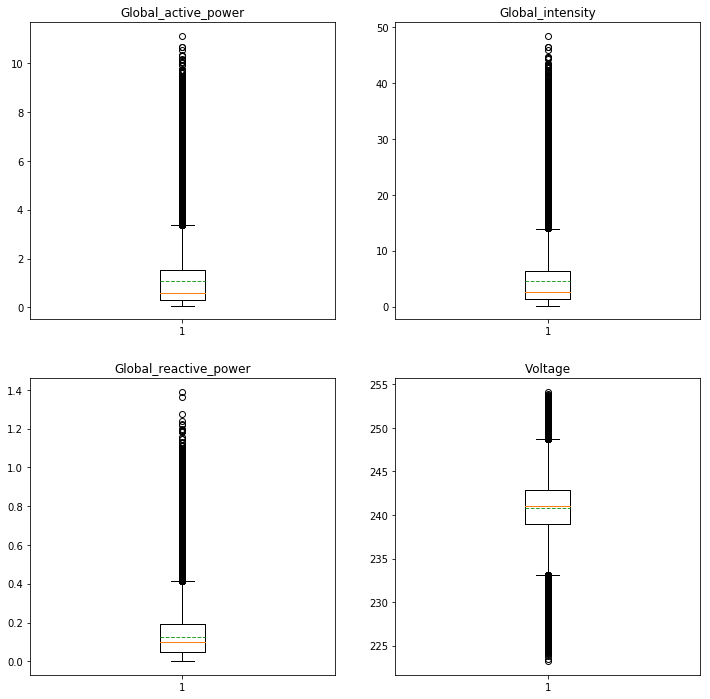

In [62]:
# not going to standardize the features for now
fig = plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.boxplot(df.Global_active_power, meanline=True, showmeans=True)
plt.title("Global_active_power")
plt.subplot(2,2,2)
plt.boxplot(df.Global_intensity, meanline=True, showmeans=True)
plt.title("Global_intensity")
plt.subplot(2,2,3)
plt.boxplot(df.Global_reactive_power, meanline=True, showmeans=True)
plt.title("Global_reactive_power")
plt.subplot(2,2,4)
plt.boxplot(df.Voltage, showmeans=True, meanline=True)
plt.title("Voltage")

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


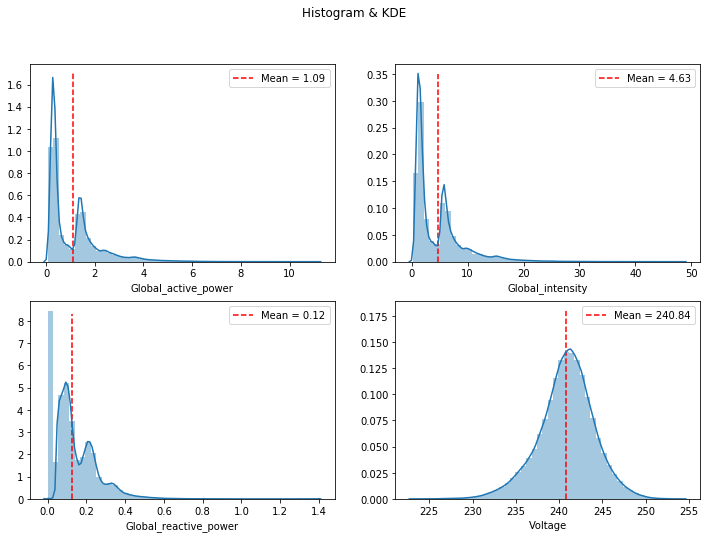

In [18]:
fig = plt.figure(figsize=(12,8))
fig.suptitle("Histogram & KDE")
plt.subplot(2,2,1)
sns.distplot(df.Global_active_power)
plt.vlines(df.Global_active_power.mean(), label="Mean = {}".format(round(df.Global_active_power.mean(),2)), ymin=0, ymax=1.7, linestyles="dashed", colors=["red"])
plt.legend()
plt.subplot(2,2,2)
sns.distplot(df.Global_intensity)
plt.vlines(df.Global_intensity.mean(), label="Mean = {}".format(round(df.Global_intensity.mean(),2)), ymin=0, ymax=0.35, linestyles="dashed", colors=["red"])
plt.legend()
plt.subplot(2,2,3)
sns.distplot(df.Global_reactive_power)
plt.vlines(df.Global_reactive_power.mean(), label="Mean = {}".format(round(df.Global_reactive_power.mean(),2)), ymin=0, ymax=8.3, linestyles="dashed", colors=["red"])
plt.legend()
plt.subplot(2,2,4)
sns.distplot(df.Voltage)
plt.vlines(df.Voltage.mean(), label="Mean = {}".format(round(df.Voltage.mean(),2)), ymin=0, ymax=0.18, linestyles="dashed", colors=["red"])
plt.legend()
plt.show()

The box plot perfectly summarizes a lot of the higher-level statistical features of our data, including the bias, variance, mean, median, and percentiles.

Firstly, the solid orange line represents the median while the dashed green line is the mean. All of the above box plots are "tall" which indicates high variability in the data for each feature, the median for the first 3 variables are close to the bottom, meaning that our data is skewed: most of the readings are lower. The whiskers indicate that the first 3 variables are highly variable, but only in the direction of larger values. This explains why the standard deviations of these features are so large (with respect to their mean), possibly suggesting a bi-modal distribution? By plotting the histograms (as well as overlaying a KDE curve) we can see this more clearly.

The distributions of sub-metering 1,2 and 3 are quite skewed (as shown in the box plots), suggesting a Poisson distribution.

In [183]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
Sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


# Questions

Using only this data, can we provide any forecasting? For the utility company and the customer?

## Weekdays vs. Weekends

In [72]:
# first we need to resample our data, aggregating the values on a daily basis
df_days = df.resample('D').mean()
weekdays = df_days[df_days.index.dayofweek.isin([0,1,2,3,4])]
weekends = df_days[df_days.index.dayofweek.isin([5,6])]
# not sure why NA values are being introduced...
weekdays.dropna(inplace=True)
weekends.dropna(inplace=True)

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [88]:
ttests = {"Global_active_power" : ttest_ind(weekdays.Global_active_power, weekends.Global_active_power, equal_var=False).pvalue,
          "Sub_metering_1" : ttest_ind(weekdays.Sub_metering_1, weekends.Sub_metering_1, equal_var=False).pvalue,
          "Sub_metering_2" : ttest_ind(weekdays.Sub_metering_2, weekends.Sub_metering_2, equal_var=False).pvalue,
          "Sub_metering_3" : ttest_ind(weekdays.Sub_metering_3, weekends.Sub_metering_3, equal_var=False).pvalue,
          "Sub_metering_4" : ttest_ind(weekdays.Sub_metering_4, weekends.Sub_metering_4, equal_var=False).pvalue
         }

Text(0.5, 1.0, 'Weekends')

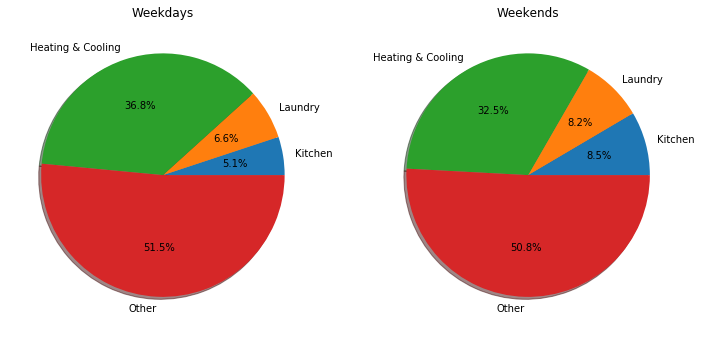

In [91]:
labels = ["Kitchen", "Laundry", "Heating & Cooling", "Other"]
ratios_weekdays = [weekdays.Sub_metering_1.mean(), 
                   weekdays.Sub_metering_2.mean(),
                   weekdays.Sub_metering_3.mean(),
                   weekdays.Sub_metering_4.mean()
                  ]
ratios_weekends = [weekends.Sub_metering_1.mean(), 
                   weekends.Sub_metering_2.mean(), 
                   weekends.Sub_metering_3.mean(), 
                   weekends.Sub_metering_4.mean()]
# The total power is = to Global_active_power.mean()*1000/60
# so multiply the means by (100/6) to get the percent of total power
ratios_weekdays = np.divide(ratios_weekdays, (100/6)*weekdays.Global_active_power.mean())

ratios_weekends = np.divide(ratios_weekends, (100/6)*weekends.Global_active_power.mean())

fig = plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.pie(ratios_weekdays, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Weekdays")
plt.subplot(1,2,2)
plt.pie(ratios_weekends, labels=labels, autopct='%1.1f%%', shadow=True)
plt.title("Weekends")

In [92]:
ttests

{'Global_active_power': 5.7736192508333766e-12,
 'Sub_metering_1': 4.3499985516699334e-27,
 'Sub_metering_2': 1.8217270312804771e-09,
 'Sub_metering_3': 0.05663256526077492,
 'Sub_metering_4': 2.1940495668929437e-07}

The pie charts above suggest a significant change in sub-metering 1,2 and 3 but not really for other. However, according to the T-Tests we performed there we can conclude that there a statistical significance in weekend vs. weekday usage for kitchen, laundry and other electrical equipment, but not in heating & cooling usage.

## Hourly

In [93]:
hourly = df.groupby(df.index.hour).mean()
weekday = df.groupby(df.index.weekday).mean()
weekly = df.groupby(df.index.weekofyear).mean()
quarterly = df.groupby(df.index.quarter).mean()

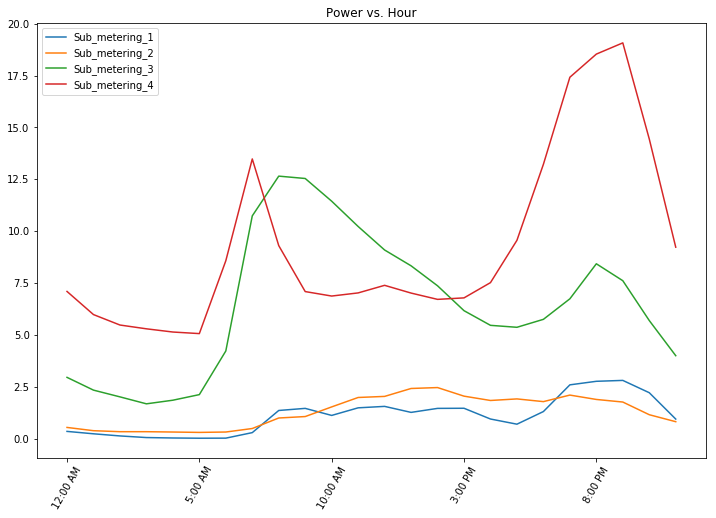

In [103]:
plt.figure(figsize=(12,8))
plt.plot(hourly.Sub_metering_1)
plt.plot(hourly.Sub_metering_2)
plt.plot(hourly.Sub_metering_3)
plt.plot(hourly.Sub_metering_4)
plt.title("Power vs. Hour")
plt.legend()
times = ["12:00 AM", "5:00 AM", "10:00 AM", "3:00 PM", "8:00 PM"]
plt.xticks(range(0,24, 5), times, rotation=60)
plt.show()

There are a few behavior changes we can suggest from this plot:
  * A significant amount of power is consumed for heating & cooling purposes, replacing active sources (like central heating, AC) with more passive devices (fans or wood stove)
  * Sub-metering 4 (other) constitutes a lot of total power consumption which suggests that reducing/eliminating certain equipment that falls in this category will dramatically reduce total power consumption. 
  * The time of day that other equipment peak coincide with highs in heating & cooling in the morning (between 6-7 AM) and again in the evening (5-7 PM), which leads me to suspect usage of equipment like a coffee machine, microwave or toaster oven. Replacing these devices with more energy efficient equipment could drastically decrease power consumption. 

## Forecasting

In [142]:
def compute_rolling_averages(observed, window_length):
    # want to return the predictions (moving-averages)
    # and the deviations from this
    rolling = observed.rolling(window_length, center = True).mean()
    rolling_deviations = observed.rolling(window_length, center = True).std()
    deviations = np.abs(np.subtract(observed, rolling))
    return rolling, rolling_deviations, deviations

In [184]:
window_days = 7
window_month = 12
observed_days = df.resample('D').mean()
observed_months = df.resample('M').mean()
y_days, y_days_std, y_days_devs = compute_rolling_averages(observed_days, window_days)
y_months, y_months_std, y_months_devs = compute_rolling_averages(observed_months, window_month)
y_months6, y_months_std6, y_months_devs6 = compute_rolling_averages(observed_months, 6)

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


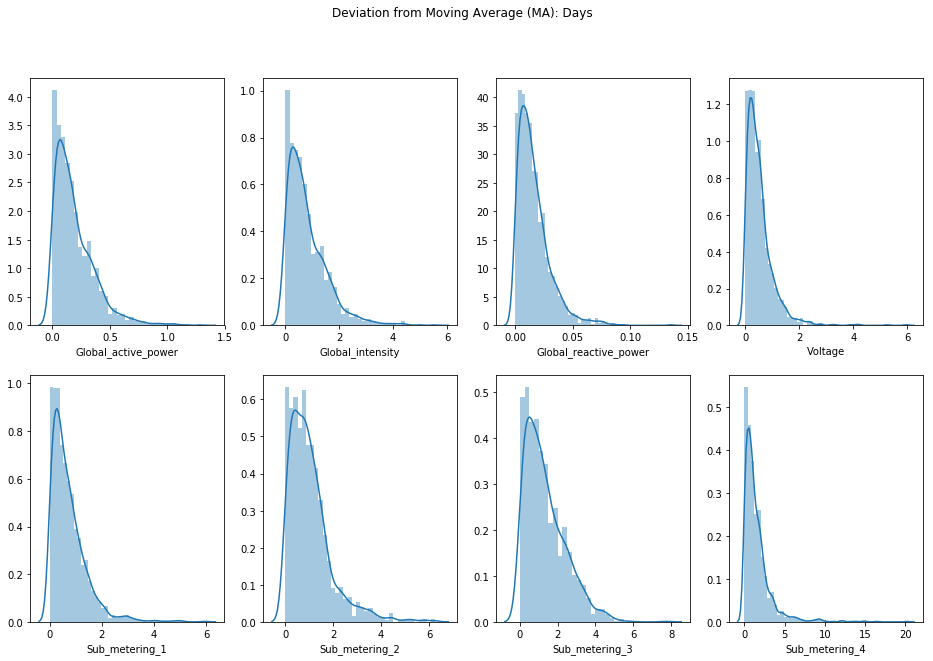

In [135]:
fig = plt.figure(figsize=(16,10))
plt.tight_layout()
plt.subplot(2,4,1)
fig.suptitle("Deviation from Moving Average (MA): Days")
sns.distplot(y_days_devs.Global_active_power.dropna())
plt.subplot(2,4,2)
sns.distplot(y_days_devs.Global_intensity.dropna())
plt.subplot(2,4,3)
sns.distplot(y_days_devs.Global_reactive_power.dropna())
plt.subplot(2,4,4)
sns.distplot(y_days_devs.Voltage.dropna())
plt.subplot(2,4,5)
sns.distplot(y_days_devs.Sub_metering_1.dropna())
plt.subplot(2,4,6)
sns.distplot(y_days_devs.Sub_metering_2.dropna())
plt.subplot(2,4,7)
sns.distplot(y_days_devs.Sub_metering_3.dropna())
plt.subplot(2,4,8)
sns.distplot(y_days_devs.Sub_metering_4.dropna())
plt.show()

/Users/mitchellmurphy/anaconda3/envs/python3.5/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


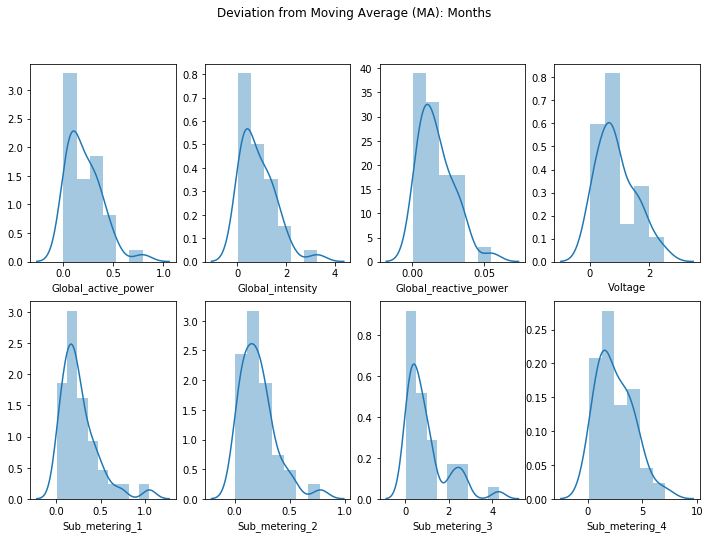

In [131]:
fig = plt.figure(figsize=(12,8))
plt.subplot(2,4,1)
fig.suptitle("Deviation from Moving Average (MA): Months")
sns.distplot(y_months_devs.Global_active_power.dropna())
plt.subplot(2,4,2)
sns.distplot(y_months_devs.Global_intensity.dropna())
plt.subplot(2,4,3)
sns.distplot(y_months_devs.Global_reactive_power.dropna())
plt.subplot(2,4,4)
sns.distplot(y_months_devs.Voltage.dropna())
plt.subplot(2,4,5)
sns.distplot(y_months_devs.Sub_metering_1.dropna())
plt.subplot(2,4,6)
sns.distplot(y_months_devs.Sub_metering_2.dropna())
plt.subplot(2,4,7)
sns.distplot(y_months_devs.Sub_metering_3.dropna())
plt.subplot(2,4,8)
sns.distplot(y_months_devs.Sub_metering_4.dropna())

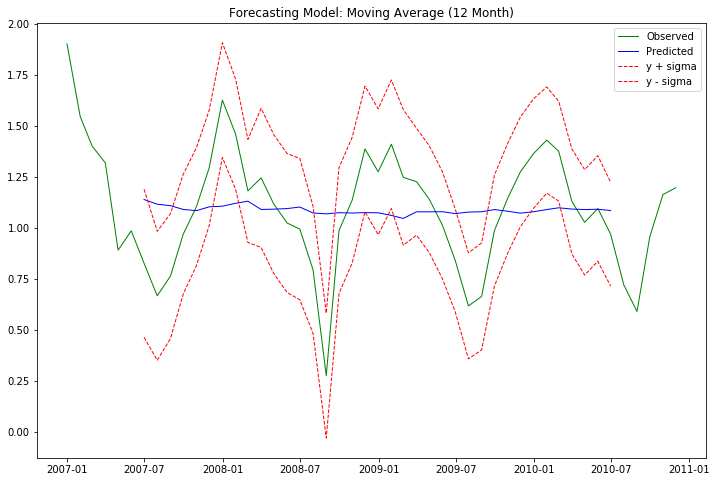

In [177]:
plt.figure(figsize=(12,8))
plt.title("Forecasting Model: Moving Average (12 Month)")
plt.plot(observed_months.Global_active_power, 
         color = "green", 
         label="Observed", 
         linewidth=1)
plt.plot(y_months.Global_active_power, 
         color="blue", 
         label="Predicted", 
         linewidth=1)
plt.plot(np.add(observed_months.Global_active_power, 
                y_months_std.Global_active_power), 
         linestyle="--", 
         color="red", 
         label="y + sigma", 
         linewidth=1)
plt.plot(np.subtract(observed_months.Global_active_power, 
                     y_months_std.Global_active_power), 
         linestyle="--", 
         color="red", 
         label="y - sigma", 
         linewidth=1)
plt.legend()
plt.show()

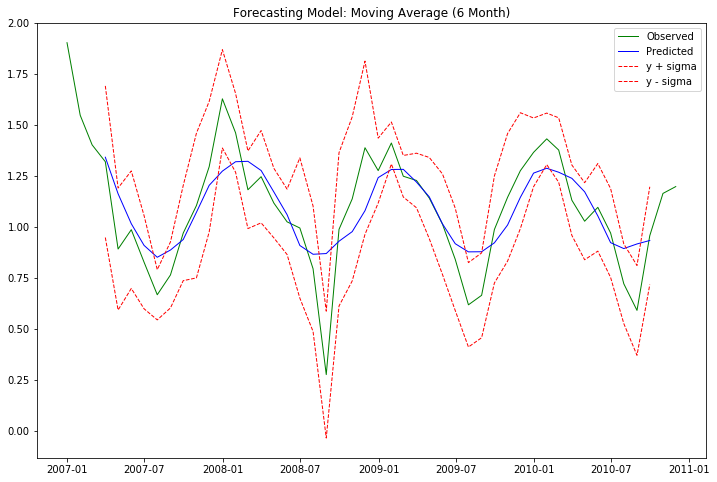

In [185]:
plt.figure(figsize=(12,8))
plt.title("Forecasting Model: Moving Average (6 Month)")
plt.plot(observed_months.Global_active_power, 
         color = "green", 
         label="Observed", 
         linewidth=1)
plt.plot(y_months6.Global_active_power, 
         color="blue", 
         label="Predicted", 
         linewidth=1)
plt.plot(np.add(observed_months.Global_active_power, 
                y_months_std6.Global_active_power), 
         linestyle="--", 
         color="red", 
         label="y + sigma", 
         linewidth=1)
plt.plot(np.subtract(observed_months.Global_active_power, 
                     y_months_std6.Global_active_power), 
         linestyle="--", 
         color="red", 
         label="y - sigma", 
         linewidth=1)
plt.legend()
plt.show()

In [190]:
# This is the  mean squared error (MSE)
print("Loss - MSE\n============================\nDaily (w = 30)\n")
print(np.sum((np.subtract(y_days, observed_days)**2)) / len(observed_days))
print("\n===============================\nMonthly (w = 12)\n")
print(np.sum(np.subtract(y_months, observed_months)**2) / len(observed_months))
print("\n===============================\nMonthly (w = 6)\n")
print(np.sum(np.subtract(y_months6, observed_months)**2) / len(observed_months))

Loss - MSE
Daily (w = 30)

Global_active_power      0.065086
Global_reactive_power    0.000457
Voltage                  0.528291
Global_intensity         1.157186
Sub_metering_1           0.954922
Sub_metering_2           1.849922
Sub_metering_3           2.836629
Sub_metering_4           5.592176
dtype: float64

Monthly (w = 12)

Global_active_power      0.056874
Global_reactive_power    0.000330
Voltage                  0.914912
Global_intensity         0.923570
Sub_metering_1           0.084156
Sub_metering_2           0.053902
Sub_metering_3           1.394142
Sub_metering_4           6.855523
dtype: float64

Monthly (w = 6)

Global_active_power      0.024792
Global_reactive_power    0.000159
Voltage                  0.715704
Global_intensity         0.422621
Sub_metering_1           0.082406
Sub_metering_2           0.058880
Sub_metering_3           0.977123
Sub_metering_4           2.189316
dtype: float64


A simple, predictive model will be constructed only using the moving-average of the previous n periods (7 for daily, 12 for monthly).

The deviations from the observed readings and our model appear to be Poisson distributed as well (but this time unimodal), which is parameterized by only one parameter - lambda. When predicting the global_active_power variable using daily data, this rate parameter is lower than when using monthly data: this essentially means we expect less variation when predicting with monthly readings. In other words, we see more skew in daily readings than we do in monthly readings.  

When it comes to modeling, our aim is to minimize this error. First we need to pick a variable that we wish to predict, if in this case we want to predict global_active_power then this error equates to a difference of about 6% in the observed values when using daily data, and about 5.2% when using monthly data. Not bad for such a simplistic model.

# Conclusions
The readings appear to follow a Poisson distribution, with a large amount of them falling in the lower 50%, histograms appear to reveal a bimodal behavior – possibly conditioned on time of the day. This inherent variability in the data will lead to limitations in forecasting, unless other factors are also considered. 

Using visual and statistical techniques, I was able to deduce certain patterns in power consumption for this particular household: there is a noticeable change in power consumption from the week to weekends, especially in kitchen and laundry equipment while heating and cooling usage remained constant throughout the week. With heating & cooling usage remaining relatively constant throughout the week and the fact that it accounts for over 30% of total power use it would be preferable to decrease this. Since sub-metering 4 does not explicitly declare what equipment falls in this category and the fact that this equipment accounts for over 50% of power it could be very valuable to identify the primary sources that contribute here. 

Forecasting can be extremely valuable, and here we built a very simple model that simply predicted the power consumption using only the moving-average from previous data. We built two models, one using daily data and the other monthly. One noticeable trait of our model (monthly) is that it can predict the output (within one standard deviation) on all days with the exception of 3 time periods where power hit an extreme low or high. The observed data appears to follow a wave function, possibly indicating that power usage follows a cyclical trend like weather. We used the MSE as the loss function, and showed that decreasing the window size resulted in a lower loss. 